In [1]:
import numpy as np
from astropy.utils.data import download_file
from spectral_cube import SpectralCube
from astropy import wcs

In [2]:
# keep an interactive handle to the plot windows until they are switched off
%matplotlib widget
import pylab as pl
# set so that these display properly on black backgrounds
pl.rcParams['figure.facecolor']='w'
pl.rcParams['font.size'] = 16

In [3]:
import radio_beam

In [4]:
from astropy import units as u

In [46]:
from astropy import coordinates

In [5]:
import regions

In [6]:
import pvextractor

In [7]:
cont = SpectralCube.read('/orange/adamginsburg/salt/s255ir/imaging/S255IR-SMA1_sci.spw25_27_29_31.mfs.I.manual.image.tt0.pbcor', format='casa_image')
cont

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


DaskSpectralCube with shape=(1, 16000, 16000) and unit=Jy / beam and chunk size (1, 320, 16000):
 n_x:  16000  type_x: RA---SIN  unit_x: deg    range:    93.215229 deg:   93.234855 deg
 n_y:  16000  type_y: DEC--SIN  unit_y: deg    range:    17.980405 deg:   17.999071 deg
 n_s:      1  type_s: FREQ      unit_s: Hz     range: 226150052062.686 Hz:226150052062.686 Hz

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
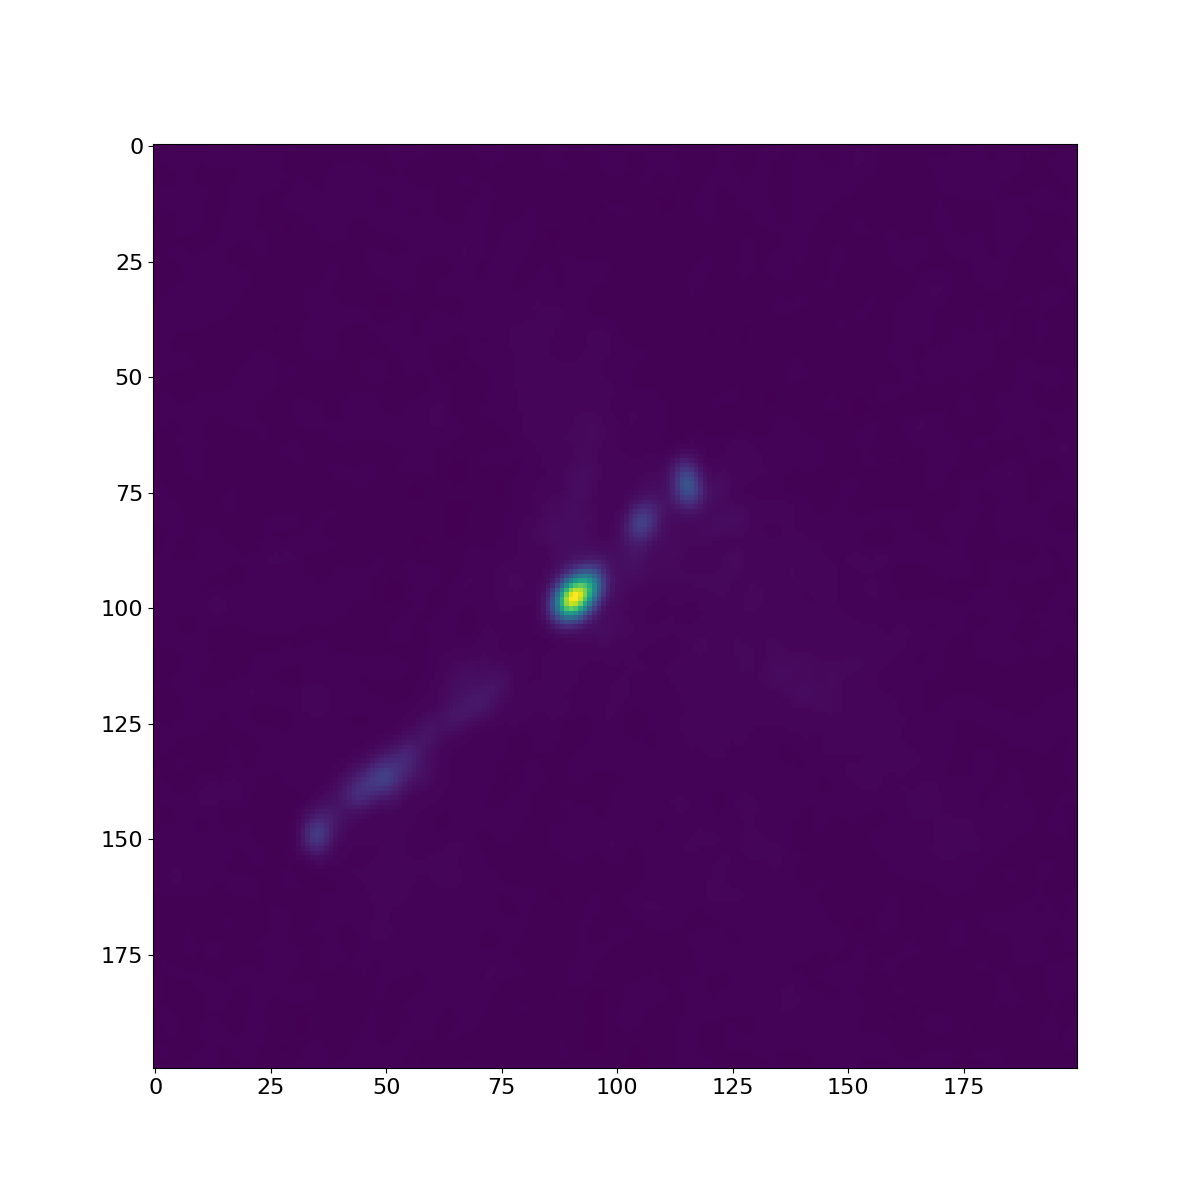

In [8]:
contcut = cont[:,7900:8100,7900:8100]
fig = pl.figure(figsize=(12,12))
pl.imshow(contcut[0].value)

In [9]:
filename2 = '/orange/adamginsburg/salt/s255ir/imaging/S255IR-SMA1_sci.spw2.cube.I.zoom.manual.image.pbcor'

In [10]:
cube = SpectralCube.read(filename2, use_dask=True, format='casa_image')[:,100:-100,100:-100]

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


In [11]:
cube

DaskVaryingResolutionSpectralCube with shape=(1920, 300, 300) and unit=Jy / beam and chunk size (80, 100, 300):
 n_x:    300  type_x: RA---SIN  unit_x: deg    range:    93.224859 deg:   93.225226 deg
 n_y:    300  type_y: DEC--SIN  unit_y: deg    range:    17.989564 deg:   17.989913 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 216863051761.207 Hz:218736973687.894 Hz

In [12]:
(217.104984-216.9431)/217.104984 * 3e5

223.6945421759845

In [13]:
cube = SpectralCube.read(filename2, use_dask=True, format='casa_image')[:,100:-100,100:-100]
siocube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=217.104984*u.GHz).spectral_slab(-100*u.km/u.s, 100*u.km/u.s)
siocube_cs = siocube-siocube.median(axis=0)
siocube_cs

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


DaskVaryingResolutionSpectralCube with shape=(149, 300, 300) and unit=Jy / beam and chunk size (80, 100, 300):
 n_x:    300  type_x: RA---SIN  unit_x: deg    range:    93.224859 deg:   93.225226 deg
 n_y:    300  type_y: DEC--SIN  unit_y: deg    range:    17.989564 deg:   17.989913 deg
 n_s:    149  type_s: VRAD      unit_s: km / s  range:     -100.118 km / s:      99.449 km / s

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
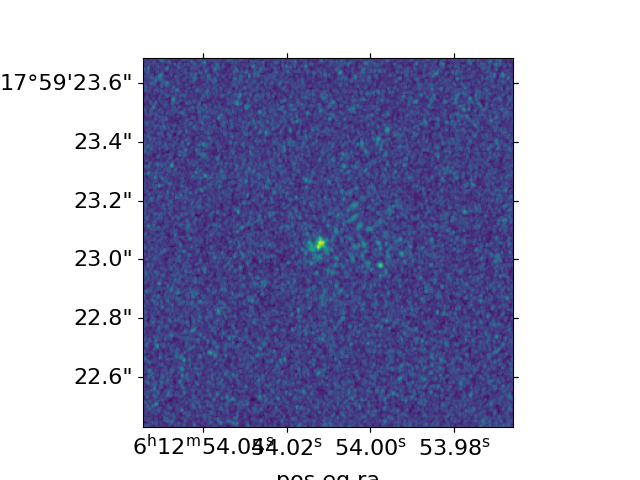

In [14]:
mxsio = siocube_cs.max(axis=0)
fig = pl.figure()
ax = fig.add_subplot(projection=siocube.wcs.celestial)
ax.imshow(mxsio.value, origin='lower')

In [15]:
heiicube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=217.009379*u.GHz).spectral_slab(-100*u.km/u.s, 100*u.km/u.s)
heiicube = heiicube - heiicube.median(axis=0)
heiicube

DaskVaryingResolutionSpectralCube with shape=(149, 300, 300) and unit=Jy / beam and chunk size (80, 100, 300):
 n_x:    300  type_x: RA---SIN  unit_x: deg    range:    93.224859 deg:   93.225226 deg
 n_y:    300  type_y: DEC--SIN  unit_y: deg    range:    17.989564 deg:   17.989913 deg
 n_s:    149  type_s: VRAD      unit_s: km / s  range:     -100.034 km / s:      99.621 km / s

In [16]:
mx = heiicube.max(axis=0)

In [17]:
path = pvextractor.Path([(70,215), (185,102)], width=5)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
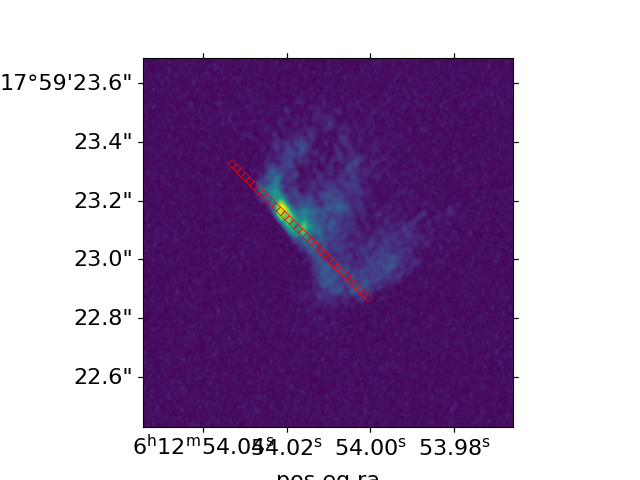

In [18]:
fig = pl.figure()
ax = fig.add_subplot(projection=cube.wcs.celestial)
ax.imshow(mx.value, origin='lower')
path.show_on_axis(ax, spacing=5, edgecolor='r', linewidth=0.5, )

In [19]:
vmax = siocube.with_mask(siocube>siocube.mad_std()*3).argmax_world(axis=0)
np.nanmedian(vmax)

<Quantity -8.42492772 km / s>

(75.0, 210.0, 75.0, 210.0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
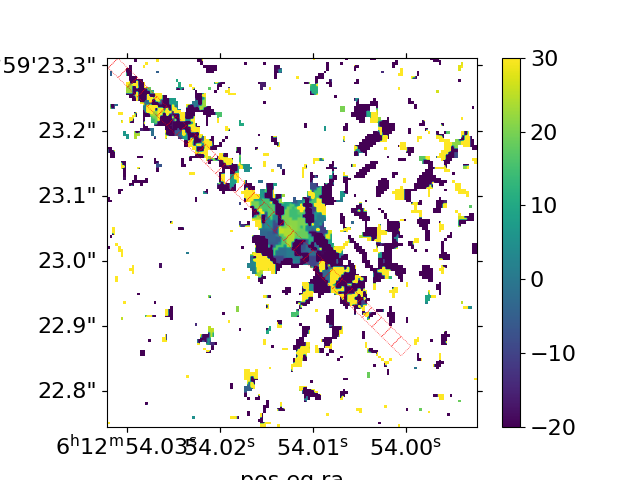

In [20]:
fig = pl.figure()
ax = fig.add_subplot(projection=cube.wcs.celestial)
im = ax.imshow(vmax.value, origin='lower', vmin=-20, vmax=30)
pl.colorbar(mappable=im)
path.show_on_axis(ax, spacing=5, edgecolor='r', linestyle=':', linewidth=0.5)
ax.axis([75,210,75,210])

In [21]:
pvdiagram = pvextractor.extract_pv_slice(cube-cube.median(axis=0), path, spacing=1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
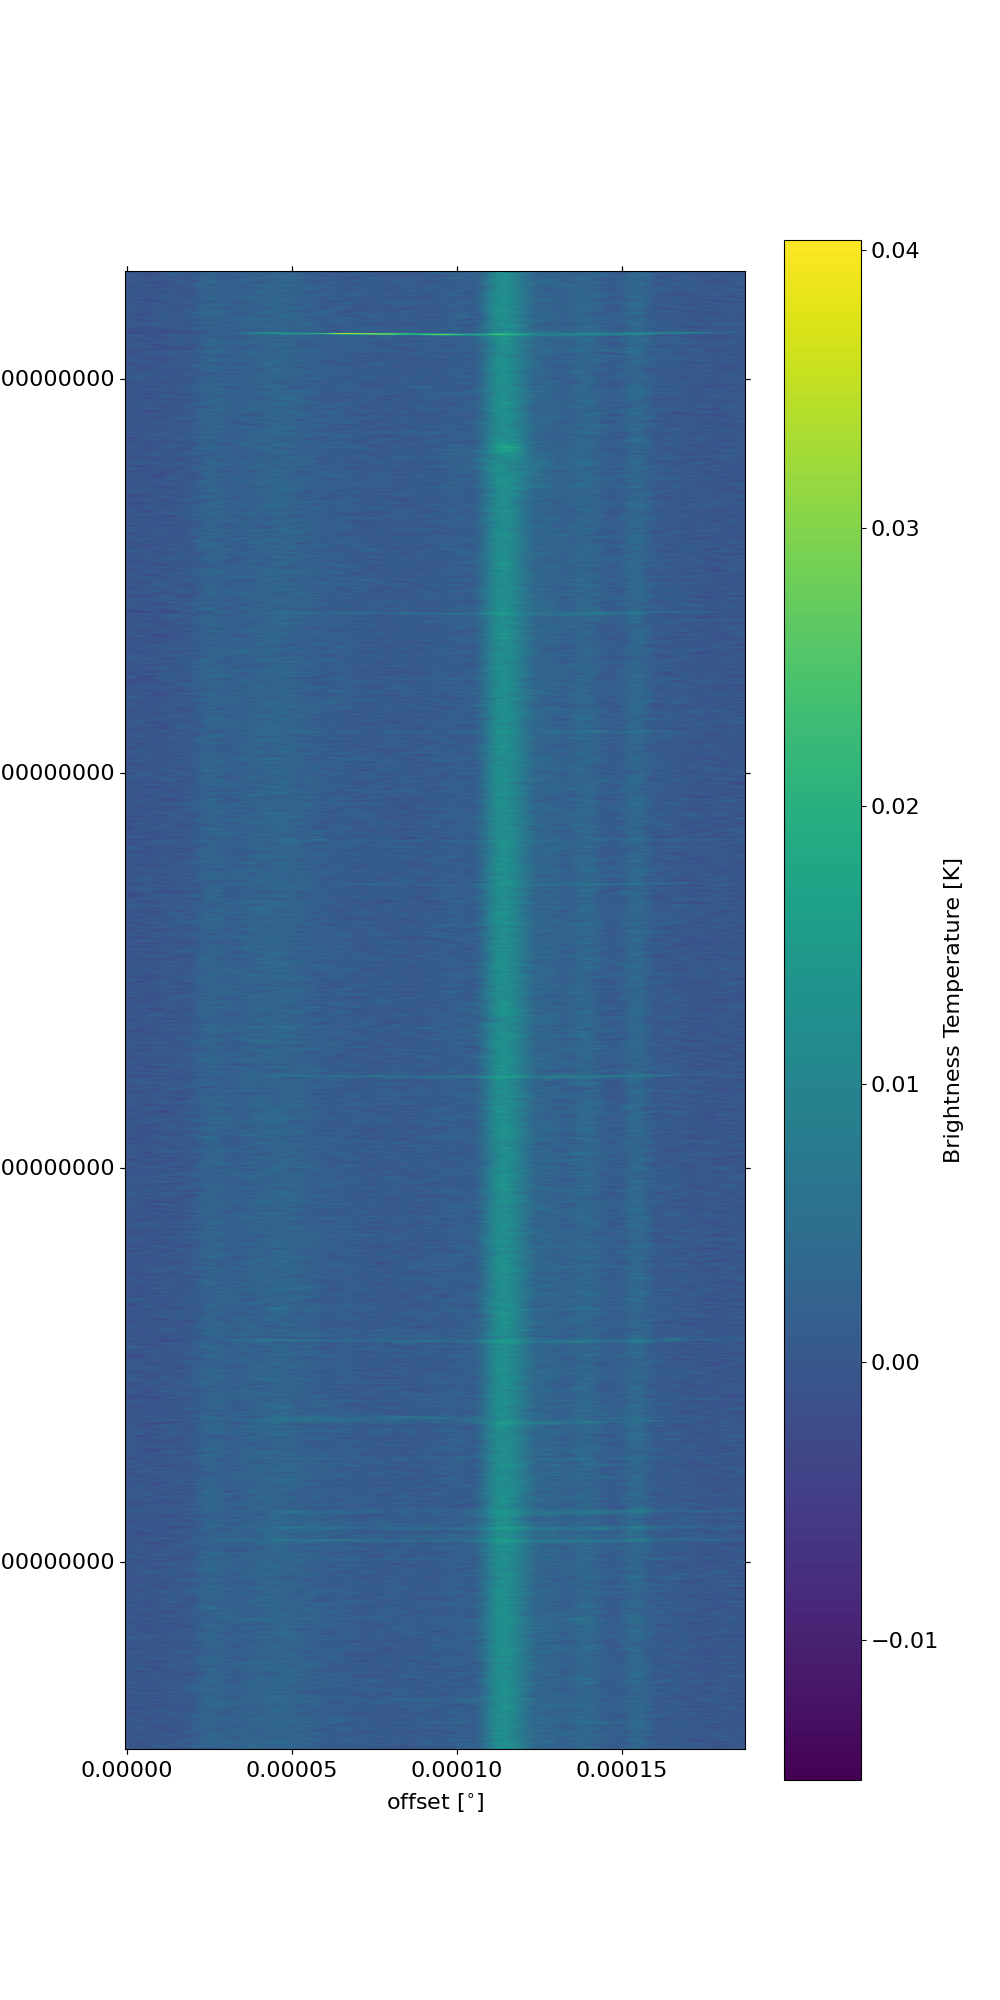

In [22]:
pl.figure(figsize=(10,20))
ax = pl.subplot(111, projection=wcs.WCS(pvdiagram.header))
im = ax.imshow(pvdiagram.data)
cb = pl.colorbar(mappable=im)
# we could specify the colorbar units like this:
# cb.set_label(cube.unit)
# but the 'BUNIT' keyword is not set for these data, so we don't know the unit.  We instead manually specify:
cb.set_label("Brightness Temperature [K]")
ax.set_aspect(0.2)

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
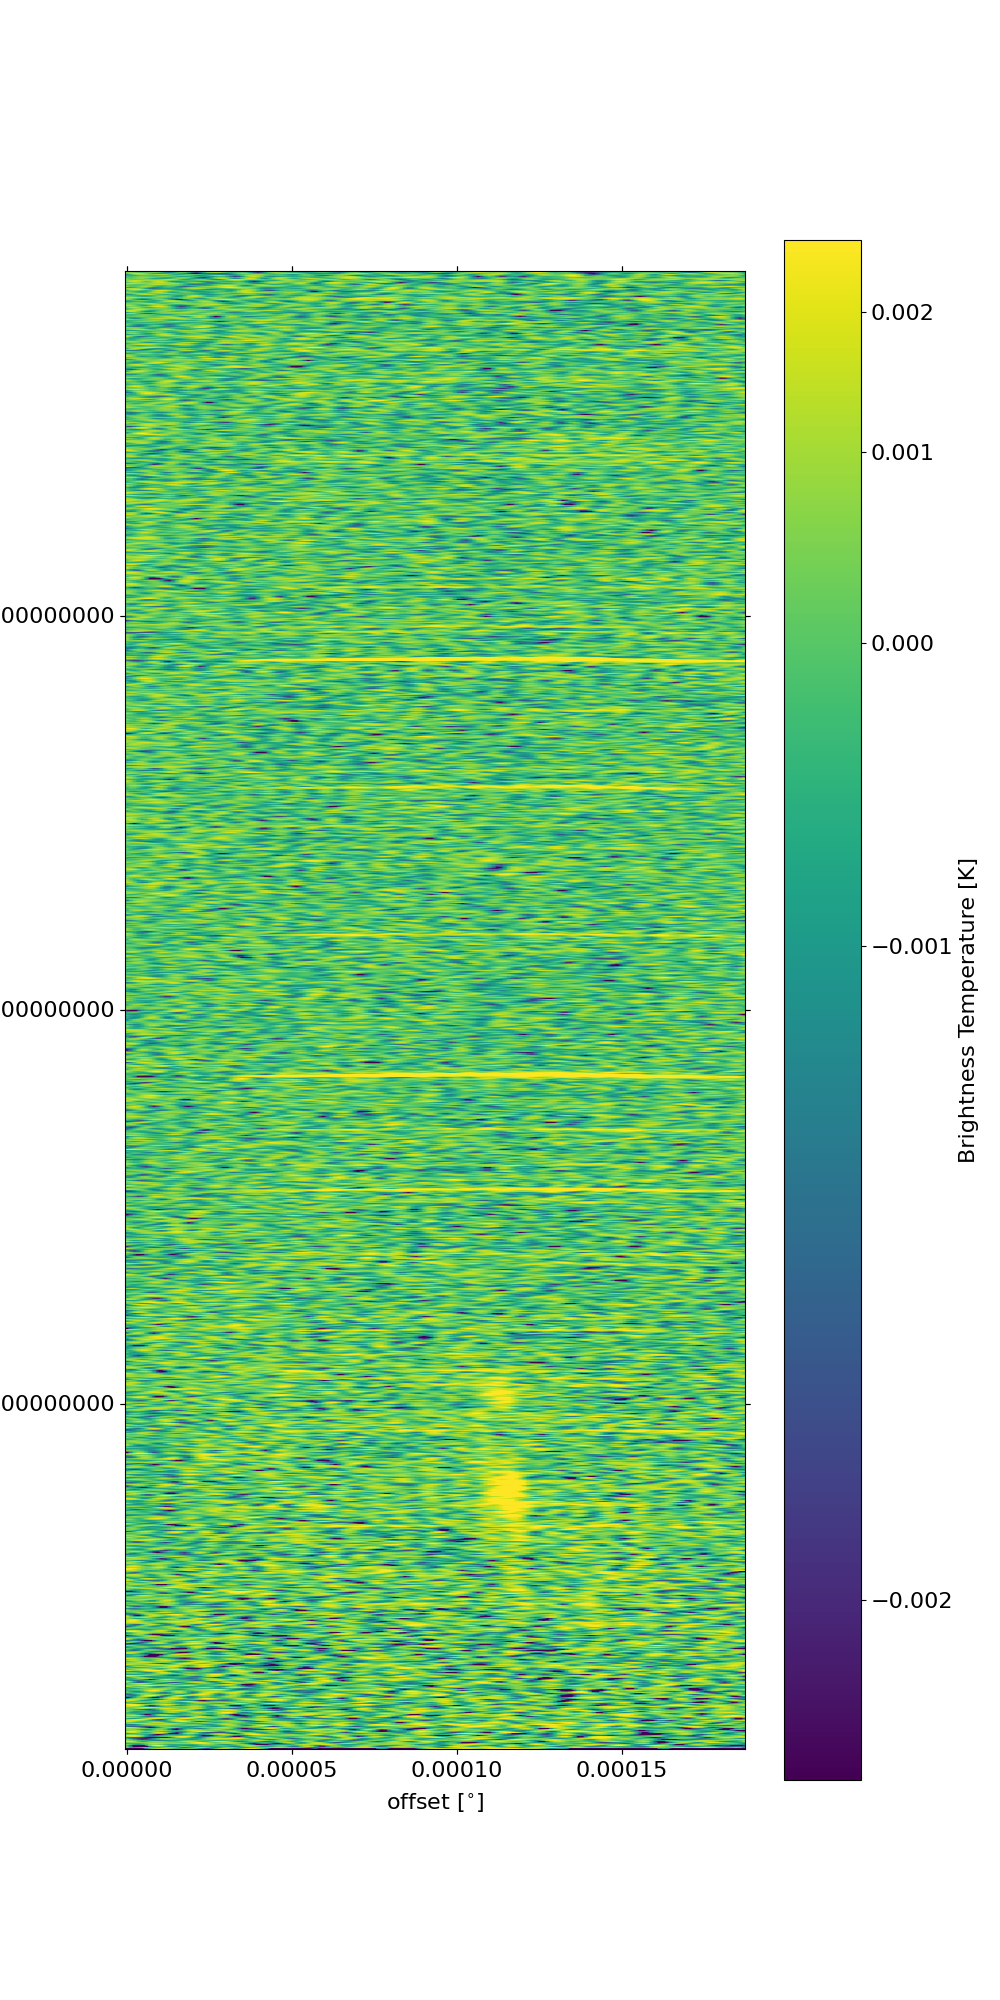

In [114]:
filename1 = '/orange/adamginsburg/salt/s255ir/imaging/S255IR-SMA1_sci.spw1.cube.I.zoom.manual.image.pbcor'
cube1 = SpectralCube.read(filename1, use_dask=True, format='casa_image')[:,100:-100,100:-100]
cube1 = cube1-cube1.median(axis=0)
pvdiagram = pvextractor.extract_pv_slice(cube1, path, spacing=1)

pl.figure(figsize=(10,20))
ax = pl.subplot(111, projection=wcs.WCS(pvdiagram.header))
im = ax.imshow(pvdiagram.data, norm=simple_norm(pvdiagram.data, min_percent=1, max_percent=99, stretch='asinh'))
cb = pl.colorbar(mappable=im)
# we could specify the colorbar units like this:
# cb.set_label(cube.unit)
# but the 'BUNIT' keyword is not set for these data, so we don't know the unit.  We instead manually specify:
cb.set_label("Brightness Temperature [K]")
ax.set_aspect(0.2)

In [107]:
watercube =  cube1.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=232.6867*u.GHz).spectral_slab(-50*u.km/u.s, 50*u.km/u.s) 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
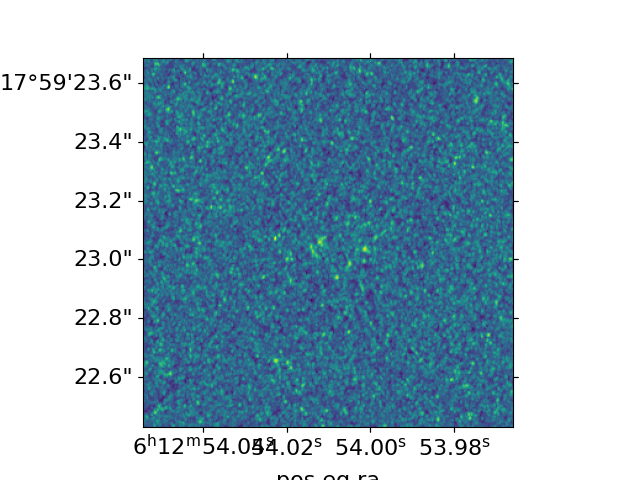

In [108]:
watermx = watercube.max(axis=0)
fig = pl.figure()
ax = fig.add_subplot(projection=cube1.wcs.celestial)
ax.imshow(watermx.value, origin='lower')
#path.show_on_axis(ax, spacing=5, edgecolor='r', linewidth=0.5, )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
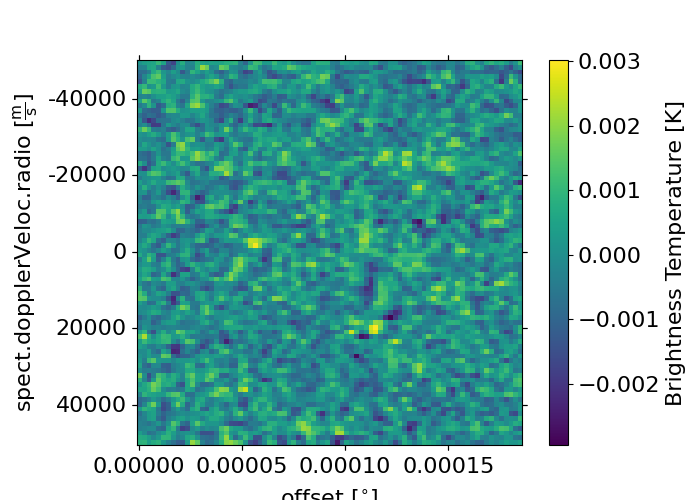

In [88]:
pvdiagram = pvextractor.extract_pv_slice(watercube-watercube.median(axis=0), path, spacing=2)

pl.figure(figsize=(7,5))
ax = pl.subplot(111, projection=wcs.WCS(pvdiagram.header))
im = ax.imshow(pvdiagram.data)
cb = pl.colorbar(mappable=im)
# we could specify the colorbar units like this:
# cb.set_label(cube.unit)
# but the 'BUNIT' keyword is not set for these data, so we don't know the unit.  We instead manually specify:
cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(0.2)

In [27]:
cube1

DaskVaryingResolutionSpectralCube with shape=(1920, 300, 300) and unit=Jy / beam and chunk size (80, 100, 300):
 n_x:    300  type_x: RA---SIN  unit_x: deg    range:    93.224859 deg:   93.225226 deg
 n_y:    300  type_y: DEC--SIN  unit_y: deg    range:    17.989564 deg:   17.989913 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 231563052620.163 Hz:233436974546.850 Hz

In [145]:
filename1 = '/orange/adamginsburg/salt/s255ir/imaging/S255IR-SMA1_sci.spw1.cube.I.zoom.manual.image.pbcor'
cube1 = SpectralCube.read(filename1, use_dask=True, format='casa_image')[:,100:-100,100:-100]
cube1 = cube1-cube1.median(axis=0)
h30acube = cube1.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=231.900928*u.GHz).spectral_slab(-75*u.km/u.s, 150*u.km/u.s)
h30acube = h30acube.with_mask(((h30acube.spectral_axis < 69*u.km/u.s) | (h30acube.spectral_axis > 75*u.km/u.s))[:,None,None])
h30acube

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


DaskVaryingResolutionSpectralCube with shape=(179, 300, 300) and unit=Jy / beam and chunk size (80, 100, 300):
 n_x:    300  type_x: RA---SIN  unit_x: deg    range:    93.224859 deg:   93.225226 deg
 n_y:    300  type_y: DEC--SIN  unit_y: deg    range:    17.989564 deg:   17.989913 deg
 n_s:    179  type_s: VRAD      unit_s: km / s  range:      -74.477 km / s:     150.229 km / s

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
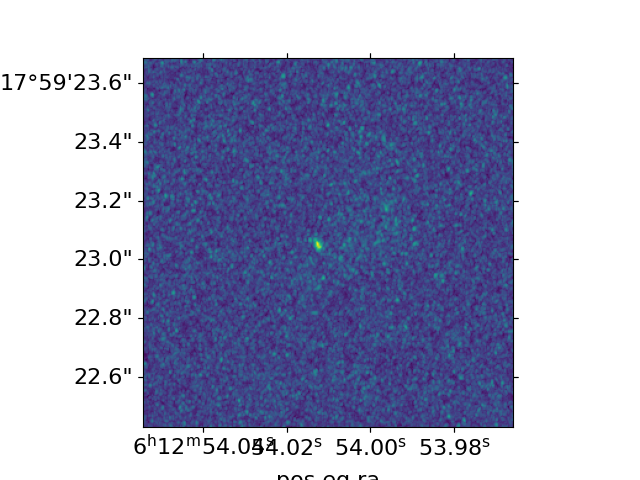

In [146]:
h30amx = h30acube.max(axis=0)
fig = pl.figure()
ax = fig.add_subplot(projection=cube1.wcs.celestial)
ax.imshow(h30amx.value, origin='lower')
#path.show_on_axis(ax, spacing=5, edgecolor='r', linewidth=0.5, )

/blue/adamginsburg/adamginsburg/repos/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


(65.0, 210.0, 75.0, 220.0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
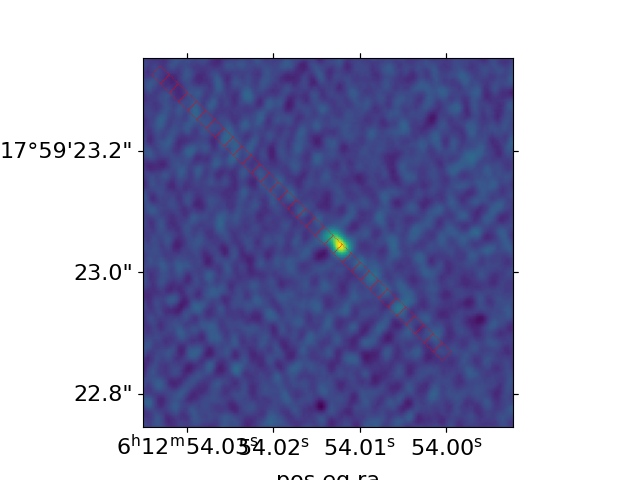

In [147]:
h30am0 = h30acube.moment0(axis=0)
fig = pl.figure()
ax = fig.add_subplot(projection=cube1.wcs.celestial)
ax.imshow(h30am0.value, origin='lower')
path.show_on_axis(ax, spacing=5, edgecolor='r', linestyle=':', linewidth=0.5, )
ax.axis([65,210,75,220])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
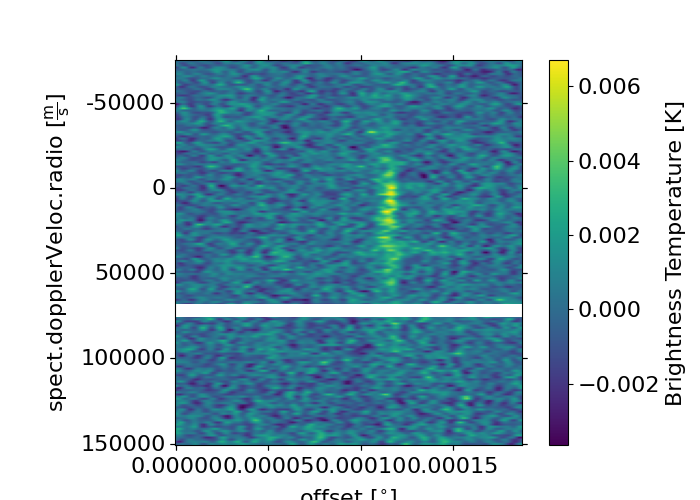

In [148]:
pvdiagram = pvextractor.extract_pv_slice(h30acube, path, spacing=1)

pl.figure(figsize=(7,5))
ax = pl.subplot(111, projection=wcs.WCS(pvdiagram.header))
im = ax.imshow(pvdiagram.data)
cb = pl.colorbar(mappable=im)
# we could specify the colorbar units like this:
# cb.set_label(cube.unit)
# but the 'BUNIT' keyword is not set for these data, so we don't know the unit.  We instead manually specify:
cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(0.2)

In [149]:
from astropy.convolution import Gaussian1DKernel

In [150]:
h30a_common = h30acube.convolve_to(h30acube.beams.common_beam())

In [151]:
h30sm = h30a_common.spectral_smooth(Gaussian1DKernel(5))

In [152]:
h30ads = h30sm.downsample_axis(factor=5, axis=0)

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/dask_spectral_cube.py:1178: UserWarning: In some cases, the final shape of the output from downsample_axis is incorrect, so use the result with caution
  warnings.warn('In some cases, the final shape of the output from downsample_axis '


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/dask/array/chunk.py:142: RuntimeWarning: Mean of empty slice
  return reduction(x.reshape(newshape), axis=tuple(range(1, x.ndim * 2, 2)), **kwargs)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
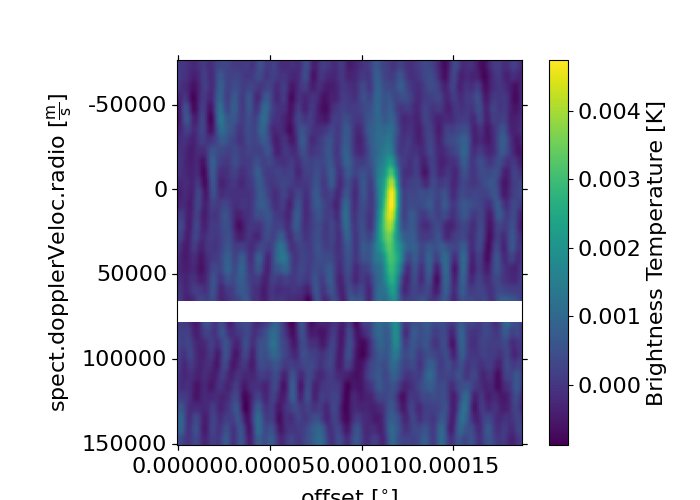

In [155]:
pvdiagram = pvextractor.extract_pv_slice(h30ads, path, spacing=1)

pl.figure(figsize=(7,5))
ax = pl.subplot(111, projection=wcs.WCS(pvdiagram.header))
im = ax.imshow(pvdiagram.data)
cb = pl.colorbar(mappable=im)
# we could specify the colorbar units like this:
# cb.set_label(cube.unit)
# but the 'BUNIT' keyword is not set for these data, so we don't know the unit.  We instead manually specify:
cb.set_label("Brightness Temperature [K]")
ax.set_aspect(5)

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
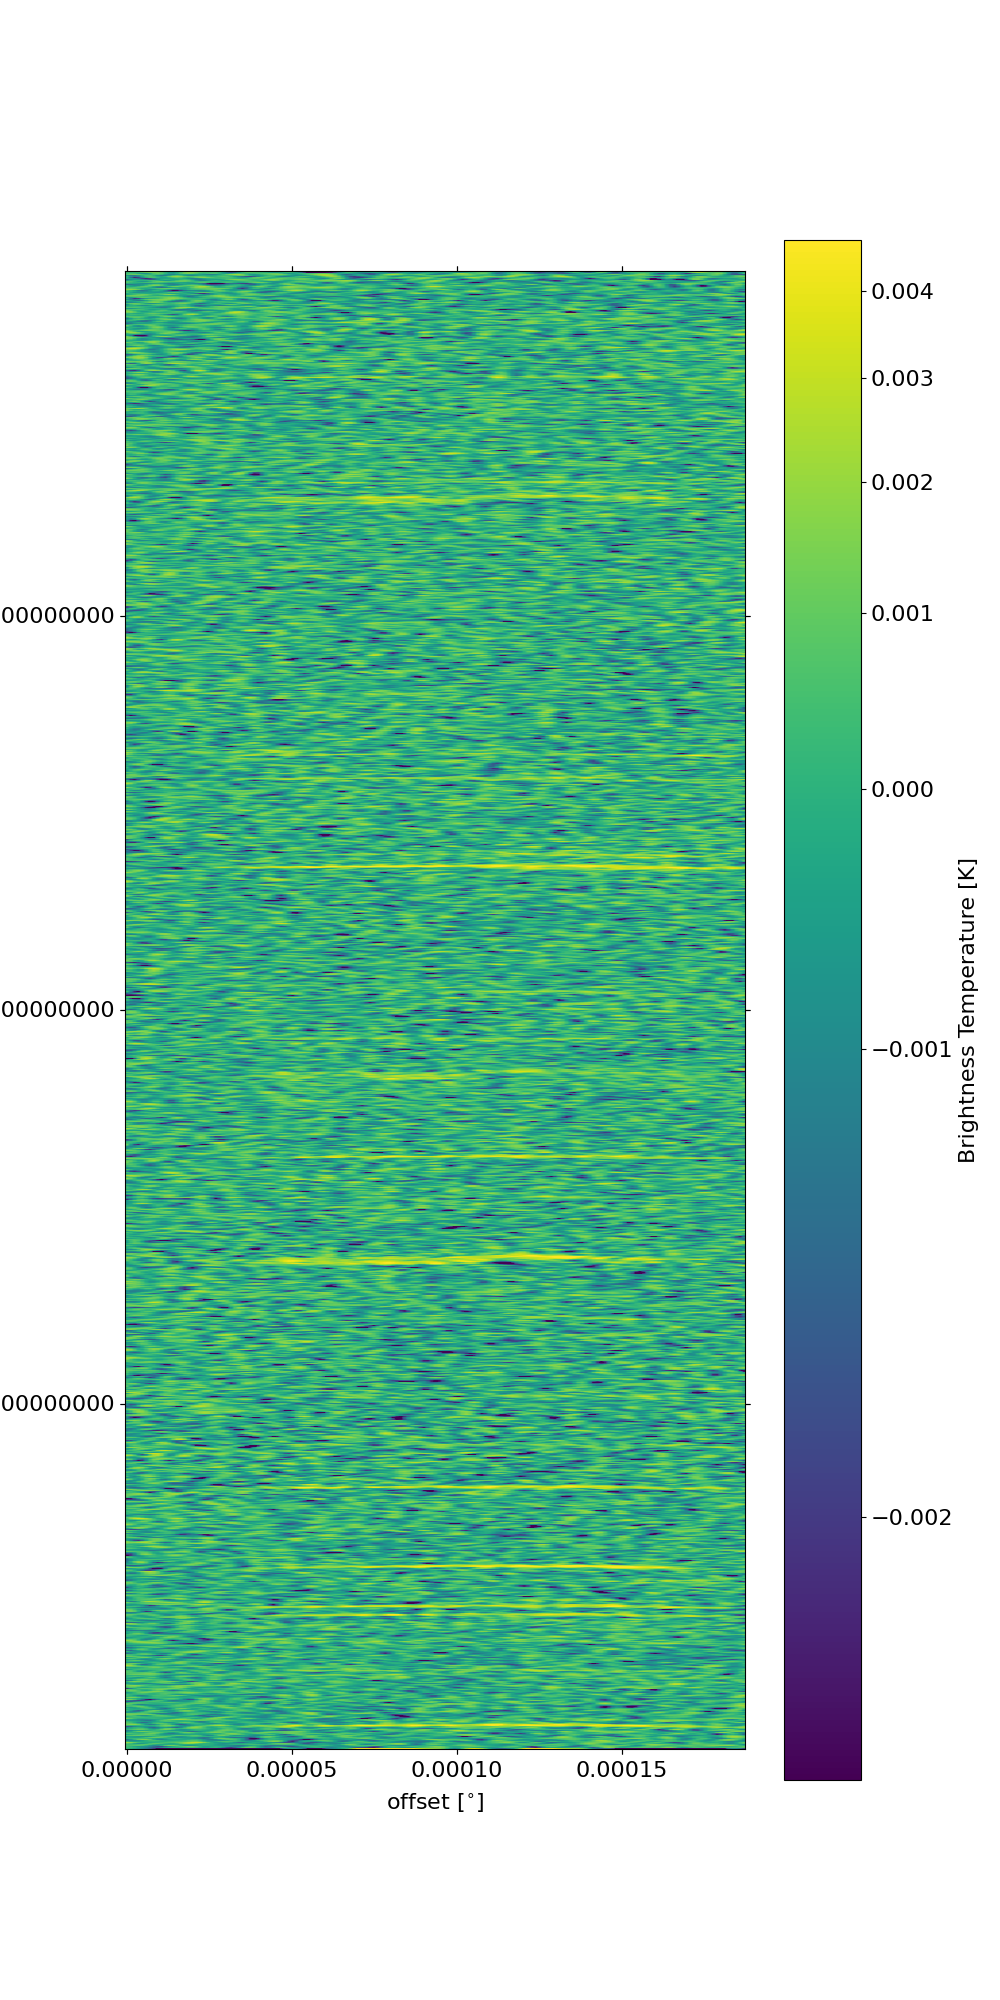

In [116]:
filename = '/orange/adamginsburg/salt/s255ir/imaging/S255IR-SMA1_sci.spw0.cube.I.zoom.manual.image.pbcor'
cube = SpectralCube.read(filename, use_dask=True, format='casa_image')[:,100:-100,100:-100]
cube = cube-cube.median(axis=0)
pvdiagram = pvextractor.extract_pv_slice(cube, path, spacing=1)

pl.figure(figsize=(10,20))
ax = pl.subplot(111, projection=wcs.WCS(pvdiagram.header))
im = ax.imshow(pvdiagram.data, norm=simple_norm(pvdiagram.data, min_percent=1, max_percent=99.9, stretch='asinh'))
cb = pl.colorbar(mappable=im)
# we could specify the colorbar units like this:
# cb.set_label(cube.unit)
# but the 'BUNIT' keyword is not set for these data, so we don't know the unit.  We instead manually specify:
cb.set_label("Brightness Temperature [K]")
ax.set_aspect(0.2)

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
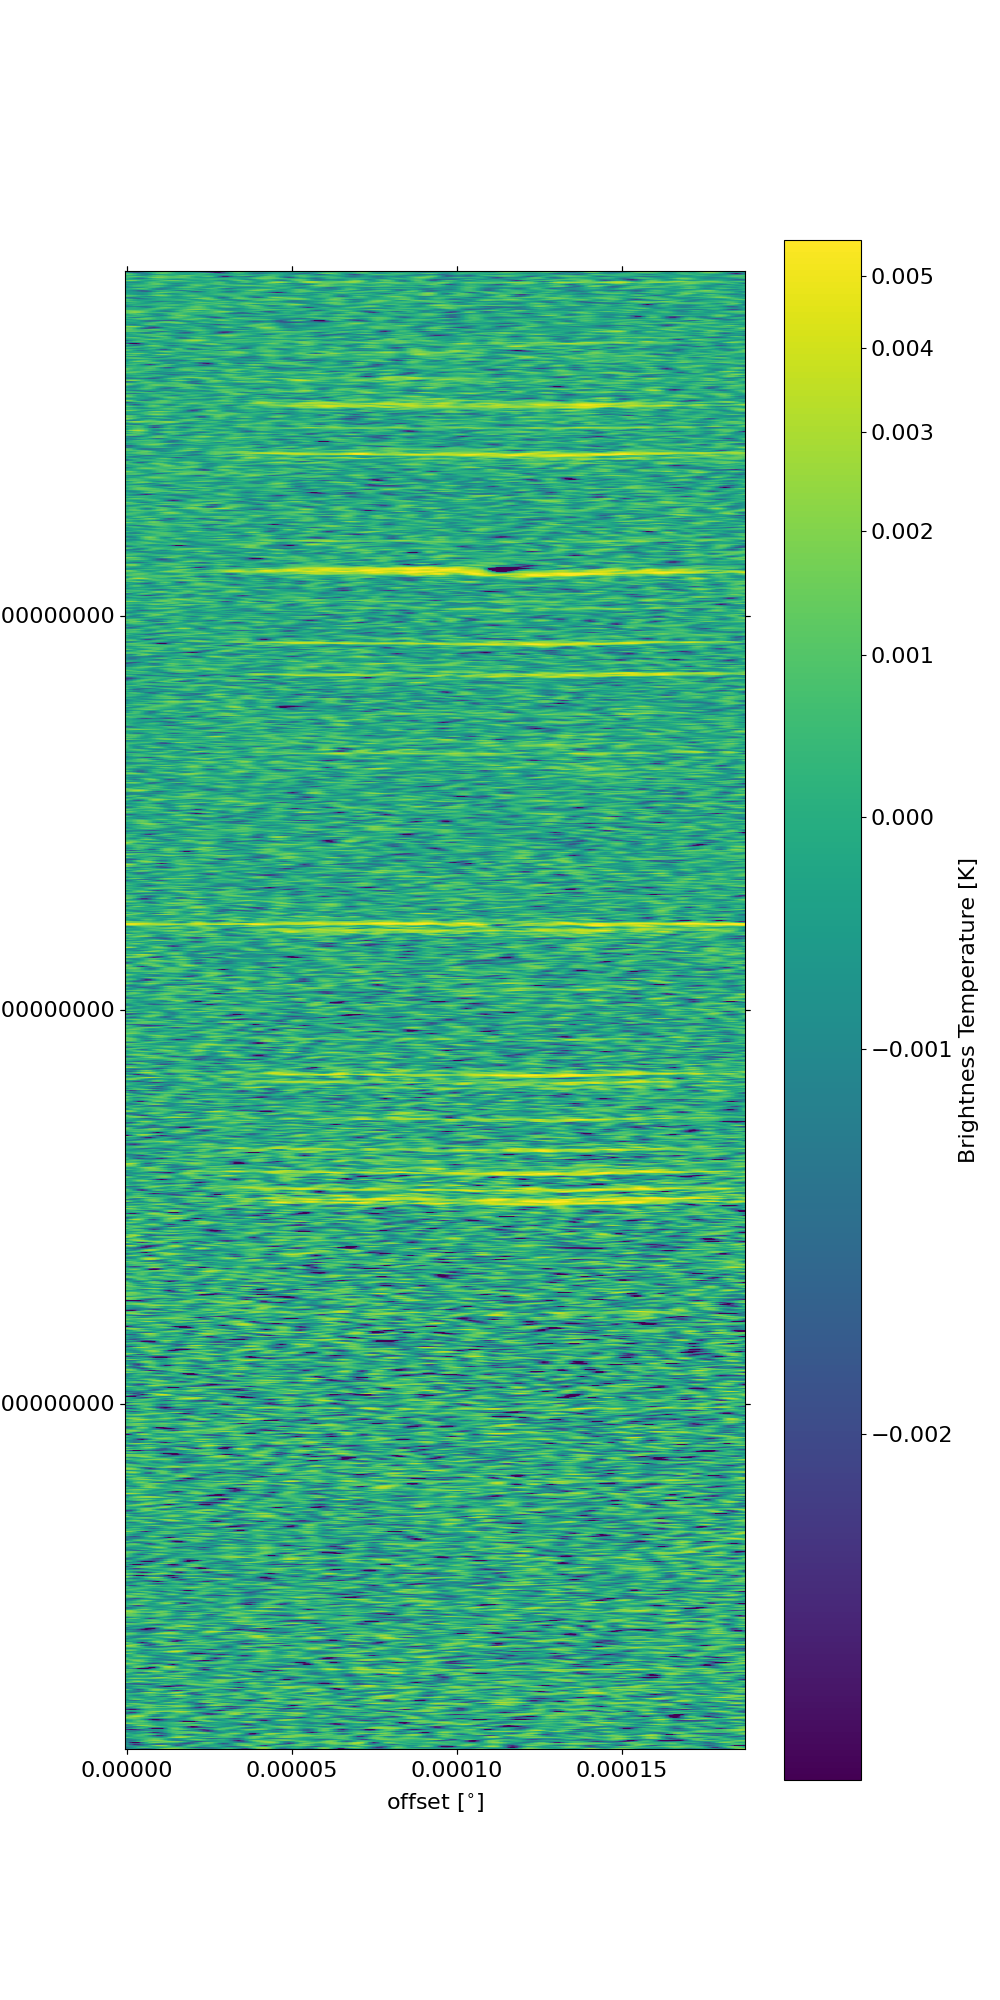

In [117]:
filename3 = '/orange/adamginsburg/salt/s255ir/imaging/S255IR-SMA1_sci.spw3.cube.I.zoom.manual.image.pbcor'
cube = SpectralCube.read(filename3, use_dask=True, format='casa_image')[:,100:-100,100:-100]
cube = cube-cube.median(axis=0)

pvdiagram = pvextractor.extract_pv_slice(cube, path, spacing=1)

pl.figure(figsize=(10,20))
ax = pl.subplot(111, projection=wcs.WCS(pvdiagram.header))
im = ax.imshow(pvdiagram.data, norm=simple_norm(pvdiagram.data, min_percent=1, max_percent=99.9, stretch='asinh'))
cb = pl.colorbar(mappable=im)
# we could specify the colorbar units like this:
# cb.set_label(cube.unit)
# but the 'BUNIT' keyword is not set for these data, so we don't know the unit.  We instead manually specify:
cb.set_label("Brightness Temperature [K]")
ax.set_aspect(0.2)

In [34]:
numax = siocube.with_mask(siocube_cs>siocube_cs.mad_std()*3).with_spectral_unit(u.GHz).argmax_world(axis=0)

217.13413082678716

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
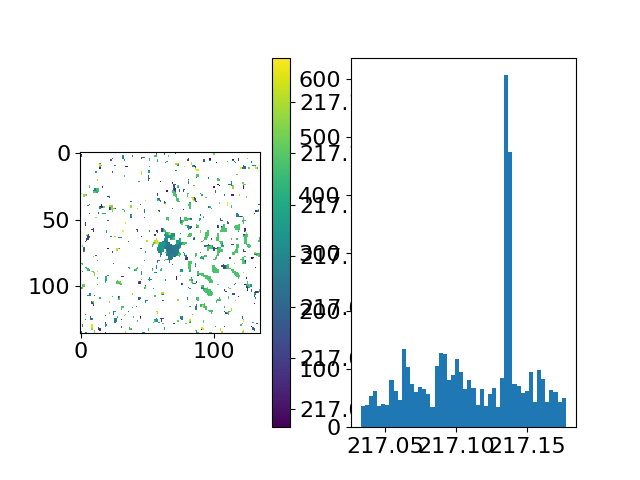

In [35]:
pl.figure()
im = pl.subplot(1,2,1).imshow(numax.value[75:210,75:210])
pl.colorbar(mappable=im)
h,l,p=pl.subplot(1,2,2).hist(numax[75:210,75:210].value.ravel(), bins=50)
l[h.argmax()]

In [36]:
restfreq = 216.945559*u.GHz # CH3OH 5(-1,4)-4(-2,3)E,vt=0
ch3ohcube = SpectralCube.read(filename2, use_dask=True, format='casa_image')[1825:1855,100:-100,100:-100]
ch3ohcube = ch3ohcube - SpectralCube.read(filename2, use_dask=True, format='casa_image')[1725:1955,100:-100,100:-100].median(axis=0)
numax = ch3ohcube.with_mask(ch3ohcube>ch3ohcube.mad_std()*3).with_spectral_unit(u.GHz).argmax_world(axis=0)

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


In [37]:
vmax_ch3oh = ch3ohcube.with_mask(ch3ohcube>ch3ohcube.mad_std()*3).with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=216.945559*u.GHz).argmax_world(axis=0)

4.127404919442117

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
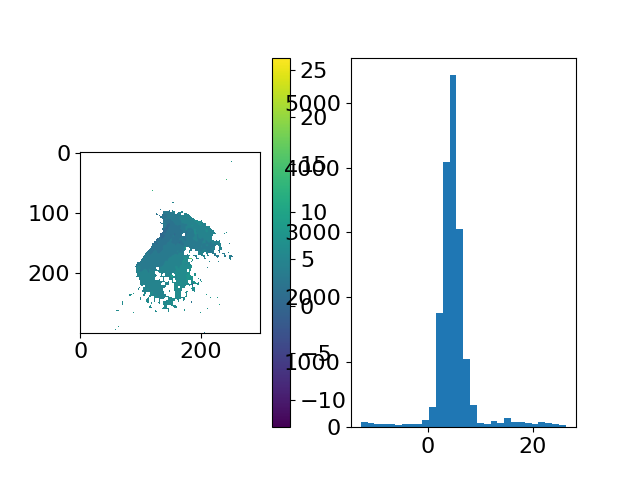

In [38]:
pl.figure()
im = pl.subplot(1,2,1).imshow(vmax_ch3oh.value)
pl.colorbar(mappable=im)
h,l,p=pl.subplot(1,2,2).hist(vmax_ch3oh.value.ravel(), bins=30)
l[h.argmax()]

In [39]:
from astroquery.splatalogue import Splatalogue
Splatalogue.query_lines(216.94144*u.GHz*(1-10/3e5), 216.94144*u.GHz*(1+10/3e5)).show_in_notebook()

In [40]:
Splatalogue.query_lines(216.14144*u.GHz, 236.94144*u.GHz, chemical_name='Hydrogen Recombination').show_in_notebook()

In [41]:
Splatalogue.query_lines(216.14144*u.GHz, 236.94144*u.GHz, chemical_name='Water').show_in_notebook()

In [42]:
from astropy.visualization import simple_norm
from regions import LineSkyRegion

In [59]:
from astroquery.simbad import Simbad
tb = Simbad.query_objects([f'[WBB2011] S255IR-SMA{ii}' for ii in (1,2,3)])
crds = coordinates.SkyCoord(tb['RA'], tb['DEC'], frame='fk5', unit=(u.h,u.deg))

In [65]:
crds.to_string('hmsdms')

['06h12m54.006s +17d59m22.958s',
 '06h12m53.77s +17d59m26.1s',
 '06h12m53.88s +17d59m23.7s']

/blue/adamginsburg/adamginsburg/repos/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
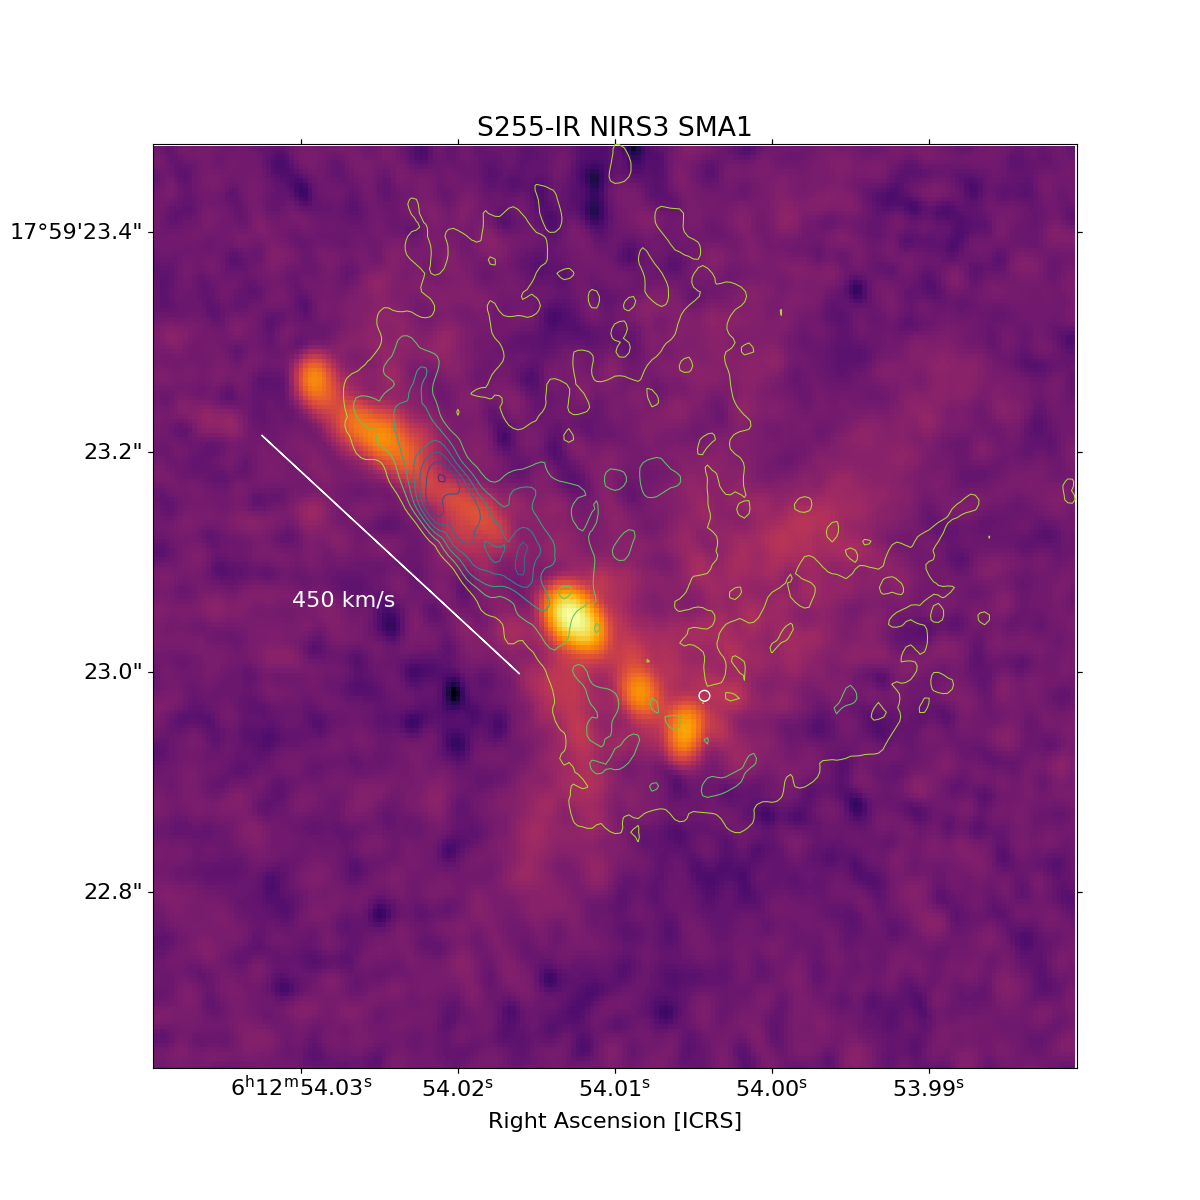

In [123]:
h30am0 = h30acube.moment0(axis=0)
fig = pl.figure(figsize=(12,12))
ax = fig.add_subplot(projection=contcut.wcs.celestial)
ax.imshow(contcut[0].value,origin='lower', norm=simple_norm(contcut[0].value, stretch='log'), cmap='inferno')

#ax.contour(h30am0.value, transform=ax.get_transform(h30acube.wcs.celestial), levels=[0.06, 0.1,], colors=['w', 'w'], linewidths=[0.5,0.5])

#ax.contour(mxsio.value, transform=ax.get_transform(siocube.wcs.celestial), levels=[0.001,0.005,0.01,0.02], cmap='viridis_r', linewidths=[0.75]*5)

ch3ohmx = ch3ohcube.max(axis=0)
ax.contour(ch3ohmx.value, transform=ax.get_transform(siocube.wcs.celestial), cmap='viridis_r', linewidths=[0.75]*5)

shift = 0.05
end = coordinates.SkyCoord(93.22512163*u.deg+shift*u.arcsec, 17.98979594*u.deg-shift*u.arcsec, frame='icrs')
start = coordinates.SkyCoord(93.22505313*u.deg+shift*u.arcsec, 17.98973565*u.deg-shift*u.arcsec, frame='icrs')
line = LineSkyRegion(start, end).to_pixel(contcut.wcs.celestial)
line.plot(ax=ax, color='w')
ax.text(30, 100, "450 km/s", fontsize=16, color='w')

ax.scatter(crds.icrs.ra, crds.icrs.dec, marker='o', color='w', s=60, facecolor='none', transform=ax.get_transform('world'))

ax.axis([0,200,0,200])
ax.set_ylabel("Declination [ICRS]")
ax.set_xlabel("Right Ascension [ICRS]")
pl.title("S255-IR NIRS3 SMA1")
fig.savefig("S255-IR_NIRS3_Jet_ch3oh.png", bbox_inches='tight')

/blue/adamginsburg/adamginsburg/repos/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
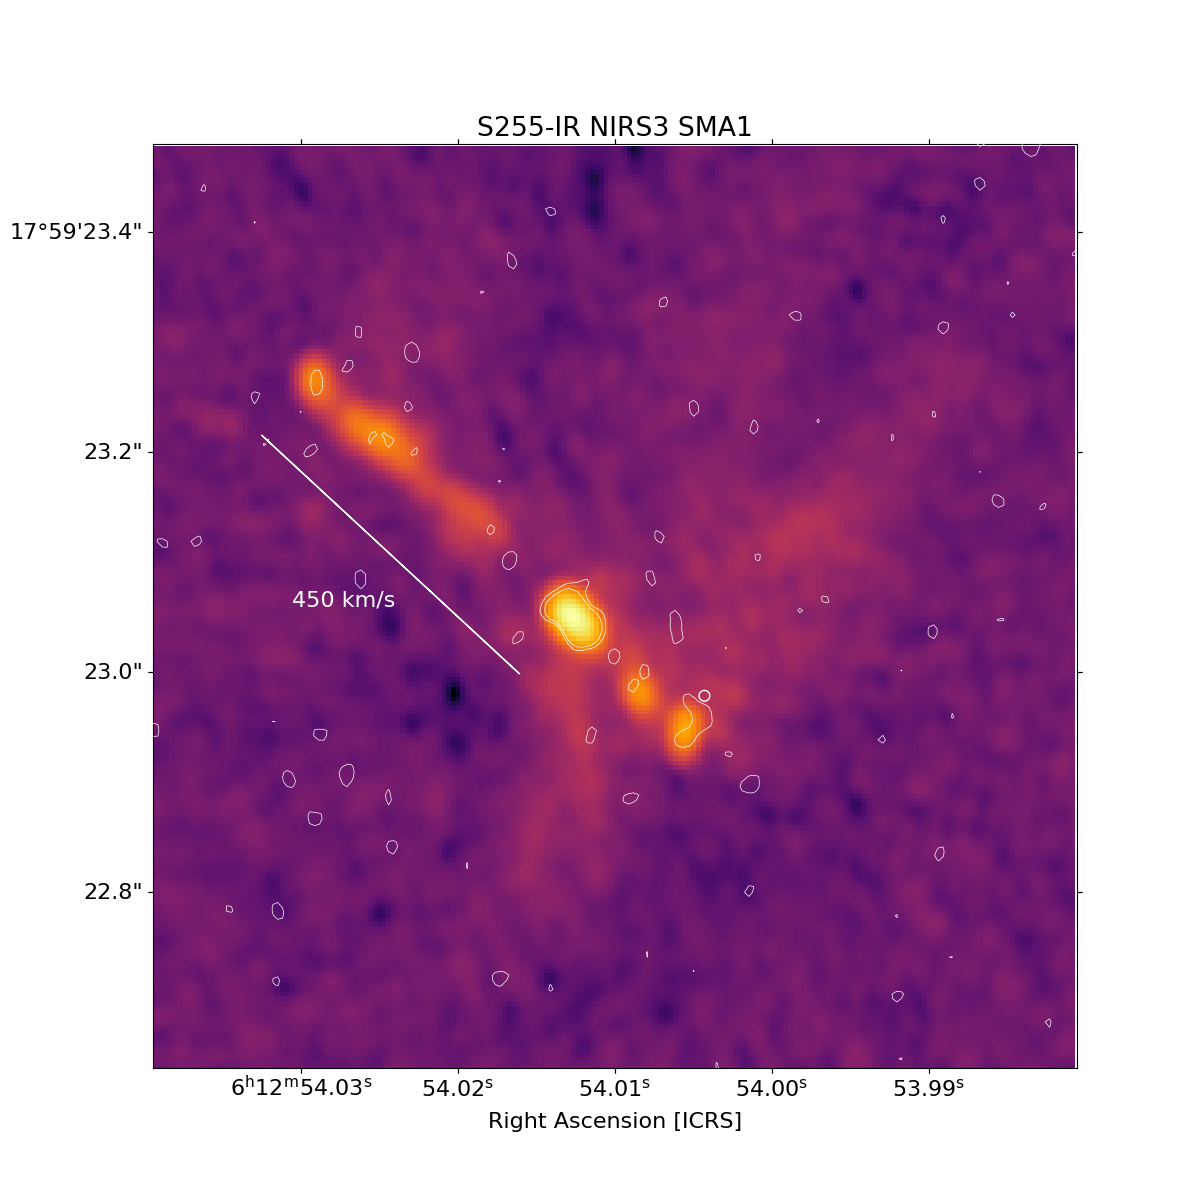

In [141]:
h30am0 = h30acube.moment0(axis=0)
fig = pl.figure(figsize=(12,12))
ax = fig.add_subplot(projection=contcut.wcs.celestial)
ax.imshow(contcut[0].value,origin='lower', norm=simple_norm(contcut[0].value, stretch='log'), cmap='inferno')

ax.contour(h30am0.value, transform=ax.get_transform(h30acube.wcs.celestial), levels=[0.06, 0.1,], colors=['w', 'w'], linewidths=[0.5,0.5])

#ax.contour(mxsio.value, transform=ax.get_transform(siocube.wcs.celestial), levels=[0.001,0.005,0.01,0.02], cmap='viridis_r', linewidths=[0.75]*5)

ch3ohmx = ch3ohcube.max(axis=0)
#ax.contour(ch3ohmx.value, transform=ax.get_transform(siocube.wcs.celestial), cmap='viridis_r', linewidths=[0.75]*5)

shift = 0.05
end = coordinates.SkyCoord(93.22512163*u.deg+shift*u.arcsec, 17.98979594*u.deg-shift*u.arcsec, frame='icrs')
start = coordinates.SkyCoord(93.22505313*u.deg+shift*u.arcsec, 17.98973565*u.deg-shift*u.arcsec, frame='icrs')
line = LineSkyRegion(start, end).to_pixel(contcut.wcs.celestial)
line.plot(ax=ax, color='w')
ax.text(30, 100, "450 km/s", fontsize=16, color='w')

ax.scatter(crds.icrs.ra, crds.icrs.dec, marker='o', color='w', s=60, facecolor='none', transform=ax.get_transform('world'))

ax.axis([0,200,0,200])
ax.set_ylabel("Declination [ICRS]")
ax.set_xlabel("Right Ascension [ICRS]")
pl.title("S255-IR NIRS3 SMA1")
fig.savefig("S255-IR_NIRS3_Jet_h30a.png", bbox_inches='tight')

In [75]:
accretionburst_date = 57350
obs_date = contcut.header['MJD-OBS']
dt = (obs_date - accretionburst_date)*u.day
dt

<Quantity 2132.41064889 d>

In [76]:
distance = 1.78*u.kpc

In [77]:
end = coordinates.SkyCoord(93.22512163*u.deg, 17.98979594*u.deg, frame='icrs')
start = coordinates.SkyCoord(93.22505313*u.deg, 17.98973565*u.deg, frame='icrs')
dx = start.separation(end)
dx

<Angle 8.87668667e-05 deg>

In [119]:
(dx*distance).to(u.au, u.dimensionless_angles())

<Quantity 568.81808155 AU>

In [78]:
velo = ((dx*distance)/dt).to(u.km/u.s, u.dimensionless_angles())
velo

<Quantity 461.86411455 km / s>

In [80]:
from astropy import time

In [84]:
time.Time(accretionburst_date, format='mjd').iso

'2015-11-24 00:00:00.000'

In [85]:
time.Time(obs_date, format='mjd').iso

'2021-09-25 09:51:20.064'

In [57]:
tb

<Table length=3>
       MAIN_ID              RA           DEC      RA_PREC DEC_PREC COO_ERR_MAJA COO_ERR_MINA COO_ERR_ANGLE COO_QUAL COO_WAVELENGTH     COO_BIBCODE     SCRIPT_NUMBER_ID
                         "h:m:s"       "d:m:s"                         mas          mas           deg                                                                  
        object            str13         str13      int16   int16     float32      float32        int16       str1        str1             object            int32      
--------------------- ------------- ------------- ------- -------- ------------ ------------ ------------- -------- -------------- ------------------- ----------------
  NAME SH 2-255 IRS 1 06 12 54.0060 +17 59 22.958       8        8           --           --             0        D                2016MNRAS.460..283B                1
[WBB2011] S255IR-SMA2   06 12 53.77   +17 59 26.1       6        6           --           --             0        D              m 2011A&A...527A..32W                2
[WBB2011] S255IR-SMA3   06 12 53.88   +17 59 23.7       6        6           --           --             0        D              m 2011A&A...527A..32W                3

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
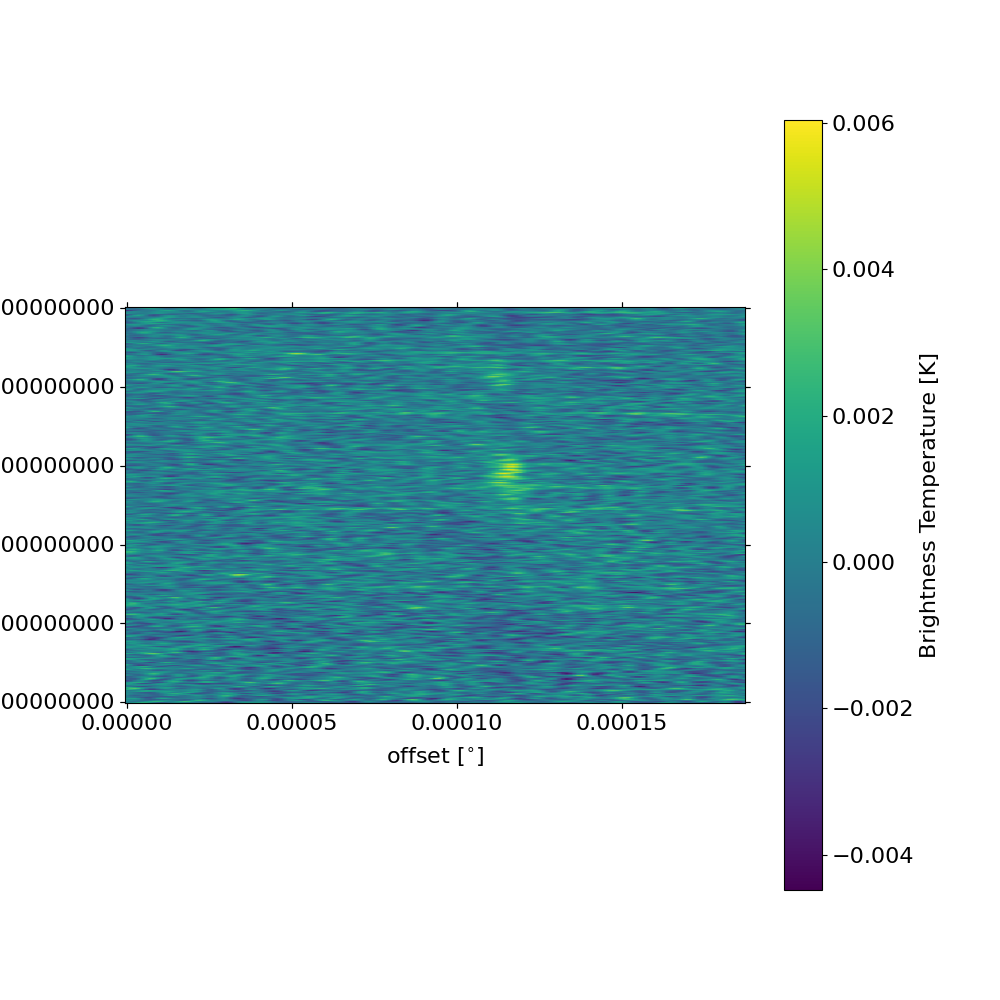

In [118]:
filename1 = '/orange/adamginsburg/salt/s255ir/imaging/S255IR-SMA1_sci.spw1.cube.I.zoom.manual.image.pbcor'
cube1 = SpectralCube.read(filename1, use_dask=True, format='casa_image')[:,100:-100,100:-100].spectral_slab(231.6*u.GHz, 232.1*u.GHz)
cube1 = cube1-cube1.median(axis=0)
pvdiagram = pvextractor.extract_pv_slice(cube1, path, spacing=1)

pl.figure(figsize=(10,10))
ax = pl.subplot(111, projection=wcs.WCS(pvdiagram.header))
im = ax.imshow(pvdiagram.data)
cb = pl.colorbar(mappable=im)
# we could specify the colorbar units like this:
# cb.set_label(cube.unit)
# but the 'BUNIT' keyword is not set for these data, so we don't know the unit.  We instead manually specify:
cb.set_label("Brightness Temperature [K]")
ax.set_aspect(0.2)